## Autores: Esther García Fernández, Jose González Abad y María Lavín Cabanas

# Workflow

En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)



# Publicación de datos iniciales

Utilizando Zenodo, de forma manual, publicar los datos que se vayan a utilizar.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Utilizar Communities para localizar más facilmente los datos</p>
</div>


In [1]:
#10.5281/zenodo.2541786

# Publicación de script de Análisis

En Github + Zenodo

In [2]:
#https://zenodo.org/record/2541830#.XD98hS2ZPxU

# Descarga de datos

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

Pista: url+'?verb=ListRecords&set=nombre_set

In [3]:
import xml.etree.ElementTree as ET
import requests
import json

oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&set=user-pruebaciclo&metadataPrefix=oai_dc')
xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2019-01-16T18:59:05Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:2541786
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-01-16T15:40:53Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-pruebaciclo
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://www.openarchives.org/OAI/2.0/oai_dc/}dc

          
{http://purl.org/dc/elements/1.1/}creator
Jose
{http://purl.org/dc/elements/1.1/}date
2019-01-16
{http://purl.org/dc/elements/1.1/}description
Datos de la población en diferentes provincias
{http://purl.org/dc/elements/1.1/}identifier
https://zenodo.org/record/2541786
{http://purl.org/dc/elements/1.1/}identifier
10.5281/

In [4]:
#Se listan los identificados de los dos recursos (dataset, los 3 primeros, y el software, los 3 últimos)
count = 0
for identifier in xmlTree.findall('.//{http://purl.org/dc/elements/1.1/}identifier'):
    print("Identifier: "+xmlTree.findall('.//{http://purl.org/dc/elements/1.1/}identifier')[count].text)
    count += 1   

Identifier: https://zenodo.org/record/2541786
Identifier: 10.5281/zenodo.2541786
Identifier: oai:zenodo.org:2541786
Identifier: https://zenodo.org/record/2541830
Identifier: 10.5281/zenodo.2541830
Identifier: oai:zenodo.org:2541830


In [5]:
import re

id = re.search('(?:/record/)(.*)', xmlTree.findall('.//{http://purl.org/dc/elements/1.1/}identifier')[0].text).group(1)

In [6]:
id

'2541786'

In [7]:
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/'+id,headers) 
record = json.loads(r.text)
print(record['files'])

[{'bucket': 'd28432ab-52cc-4378-b835-7ae279022455', 'checksum': 'md5:3a6716c7ed46e837f025537d60f2eb3c', 'key': 'Centroides_NucleosPoblacion.csv', 'links': {'self': 'https://zenodo.org/api/files/d28432ab-52cc-4378-b835-7ae279022455/Centroides_NucleosPoblacion.csv'}, 'size': 84332, 'type': 'csv'}]


In [8]:
record['files'][0]['links']['self']

'https://zenodo.org/api/files/d28432ab-52cc-4378-b835-7ae279022455/Centroides_NucleosPoblacion.csv'

In [9]:
import urllib

url = record['files'][0]['links']['self']
dataset = open("dataset.csv", 'wb')
dataset.write(urllib.request.urlopen(url).read())
dataset.close()

# Descarga de código

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Zenodo guarda un zip con el código</p>
</div>

In [10]:
id1 = re.search('(?:/record/)(.*)', xmlTree.findall('.//{http://purl.org/dc/elements/1.1/}identifier')[3].text).group(1)

In [11]:
id1

'2541830'

In [12]:
r1 = requests.get('https://zenodo.org/api/records/'+id1, headers) 
record1 = json.loads(r1.text)
print(record1['files'])

[{'bucket': '5fbaed55-ad24-45ea-ac8a-1f560b202c84', 'checksum': 'md5:be231a4d685084fd3e04ec16dfb31ccb', 'key': 'marialavinca/cicloDeVida-1.0.zip', 'links': {'self': 'https://zenodo.org/api/files/5fbaed55-ad24-45ea-ac8a-1f560b202c84/marialavinca/cicloDeVida-1.0.zip'}, 'size': 1001, 'type': 'zip'}]


In [13]:
id1

'2541830'

In [14]:
record1['files'][0]['links']['self']

'https://zenodo.org/api/files/5fbaed55-ad24-45ea-ac8a-1f560b202c84/marialavinca/cicloDeVida-1.0.zip'

In [15]:
url1 = record1['files'][0]['links']['self']
software = open("software.zip", 'wb')
software.write(urllib.request.urlopen(url1).read())
software.close()

In [16]:
import zipfile

zip_ref = zipfile.ZipFile("software.zip")
zip_ref.extractall('.')
zip_ref.close()

# Análisis de los datos

Producir fichero: Otro CSV, imagen, etc

In [17]:
%mv marialavinca-cicloDeVida-e973d26/analisis_poblacion.py .

In [18]:
%mv dataset.csv Centroides_NucleosPoblacion.csv

In [19]:
%ls

analisis_poblacion.py            M3.02Workflow.ipynb
Centroides_NucleosPoblacion.csv  marialavinca-cicloDeVida-e973d26/
figura.png                       software.zip


El número de Municipios que tienen más de 100000 habitantes es 74 .



<Figure size 432x288 with 0 Axes>

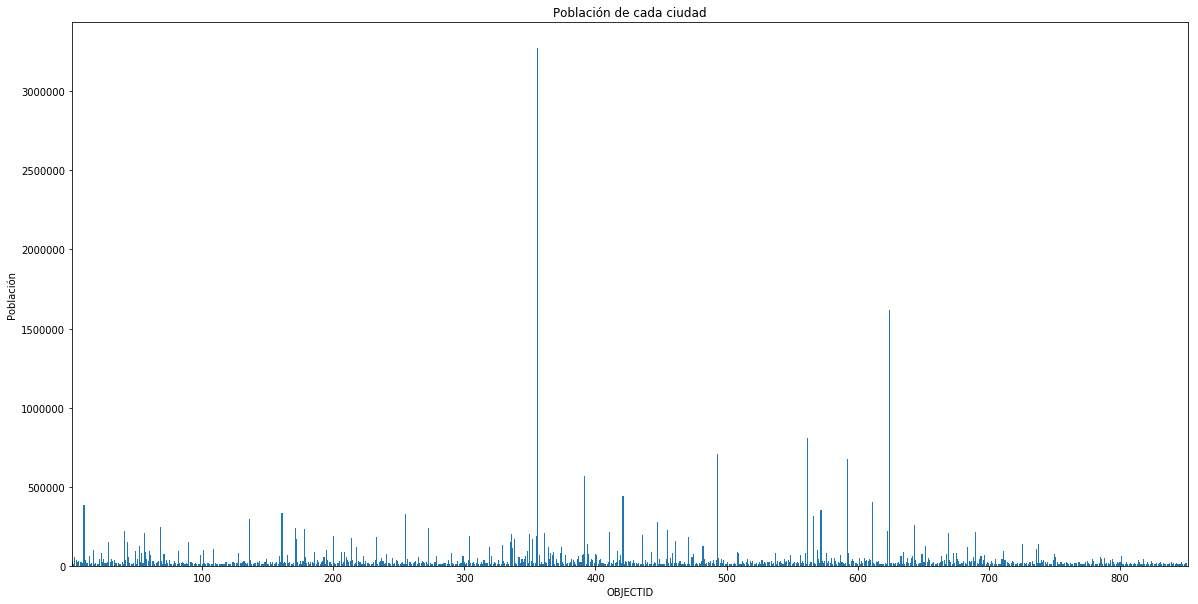

In [21]:
%run -i analisis_poblacion.py dataset.csv

# Publicación de los Datos

Utilizando la API de Zenodo

In [22]:
r = requests.get('https://zenodo.org/api/deposit/depositions', 
                 params={'access_token': '20a32sBu6WGarmZAwzR9QdtpIBggm14QbwjOE56xt1fuwvG2Jx9bIrJa5Gtv'})

r.status_code

200

In [23]:
r.json()

[{'conceptrecid': '2542087',
  'created': '2019-01-16T18:46:35.263528',
  'files': [{'checksum': 'acf4ba5b523563640db86e1cf499f820',
    'filename': 'figura.png',
    'filesize': 160745,
    'id': 'bd5b8700-e4a8-4227-9caf-49b63821031b',
    'links': {'download': 'https://zenodo.org/api/files/dd68bc36-d5e7-41cc-9d0c-4512abe974c2/figura.png',
     'self': 'https://zenodo.org/api/deposit/depositions/2536748/files/bd5b8700-e4a8-4227-9caf-49b63821031b'}}],
  'id': 2542088,
  'links': {'bucket': 'https://zenodo.org/api/files/dd68bc36-d5e7-41cc-9d0c-4512abe974c2',
   'discard': 'https://zenodo.org/api/deposit/depositions/2542088/actions/discard',
   'edit': 'https://zenodo.org/api/deposit/depositions/2542088/actions/edit',
   'files': 'https://zenodo.org/api/deposit/depositions/2542088/files',
   'html': 'https://zenodo.org/deposit/2542088',
   'latest_draft': 'https://zenodo.org/api/deposit/depositions/2542088',
   'latest_draft_html': 'https://zenodo.org/deposit/depositions/2542088',
   'pu

In [24]:
headers = {"Content-Type": "application/json"}
r = requests.post('https://zenodo.org/api/deposit/depositions',
                  params={'access_token': '20a32sBu6WGarmZAwzR9QdtpIBggm14QbwjOE56xt1fuwvG2Jx9bIrJa5Gtv'}, json={},
                  headers=headers)
r.status_code

201

In [25]:
r.json()

{'conceptrecid': '2542108',
 'created': '2019-01-16T18:59:46.737936+00:00',
 'files': [],
 'id': 2542109,
 'links': {'bucket': 'https://zenodo.org/api/files/eba49ad8-a996-4b96-b10c-d41a6f222149',
  'discard': 'https://zenodo.org/api/deposit/depositions/2542109/actions/discard',
  'edit': 'https://zenodo.org/api/deposit/depositions/2542109/actions/edit',
  'files': 'https://zenodo.org/api/deposit/depositions/2542109/files',
  'html': 'https://zenodo.org/deposit/2542109',
  'latest_draft': 'https://zenodo.org/api/deposit/depositions/2542109',
  'latest_draft_html': 'https://zenodo.org/deposit/depositions/2542109',
  'publish': 'https://zenodo.org/api/deposit/depositions/2542109/actions/publish',
  'self': 'https://zenodo.org/api/deposit/depositions/2542109'},
 'metadata': {'prereserve_doi': {'doi': '10.5281/zenodo.2542109',
   'recid': 2542109}},
 'modified': '2019-01-16T18:59:46.737956+00:00',
 'owner': 58442,
 'record_id': 2542109,
 'state': 'unsubmitted',
 'submitted': False,
 'title'

In [26]:
deposition_id = r.json()['id']
data = {'filename': 'figura.png'}
files = {'file': open('figura.png', 'rb')}
r = requests.post('https://zenodo.org/api/deposit/depositions/%s/files' % deposition_id,
                   params={'access_token': '20a32sBu6WGarmZAwzR9QdtpIBggm14QbwjOE56xt1fuwvG2Jx9bIrJa5Gtv'}, data=data,
                   files=files)
r.status_code

201

In [27]:
r.json()

{'checksum': 'acf4ba5b523563640db86e1cf499f820',
 'filename': 'figura.png',
 'filesize': 160745,
 'id': '896d5890-af0f-4817-b2f2-bbcdc2f0878b',
 'links': {'download': 'https://zenodo.org/api/files/eba49ad8-a996-4b96-b10c-d41a6f222149/figura.png',
  'self': 'https://zenodo.org/api/deposit/depositions/2542109/files/896d5890-af0f-4817-b2f2-bbcdc2f0878b'}}